In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
stock = 'TSLA'
data = pd.DataFrame()

In [3]:
data[stock] = wb.DataReader(stock, data_source='yahoo', start='2010-06-29')['Adj Close']

In [4]:
data.tail()

,TSLA
Date,
2022-09-26,276.010010
2022-09-27,282.940002
2022-09-28,287.809998
2022-09-29,268.209991
2022-09-30,265.250000


In [5]:
log_returns = np.log(1+data.pct_change())

In [6]:
log_returns.tail()

,TSLA
Date,
2022-09-26,0.002467
2022-09-27,0.024798
2022-09-28,0.017066
2022-09-29,-0.070530
2022-09-30,-0.011097


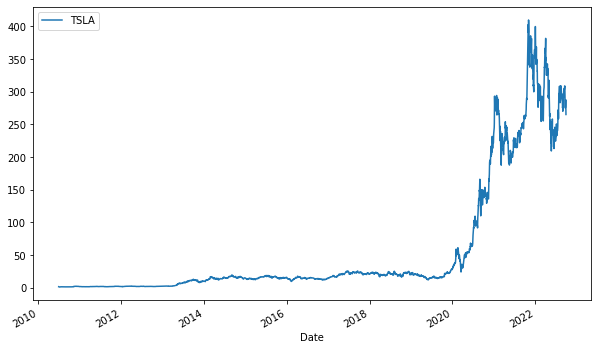

In [7]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

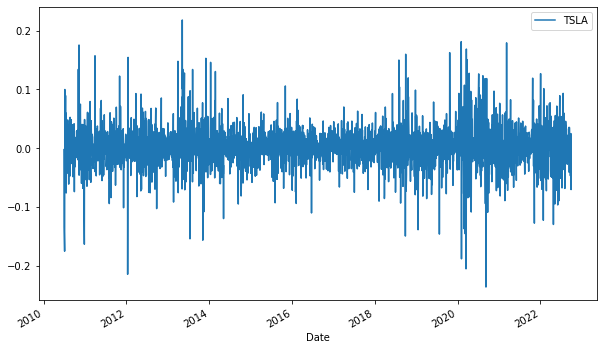

In [8]:
log_returns.plot(figsize=(10,6))

In [9]:
u = log_returns.mean()
u

TSLA    0.001658
dtype: float64

In [10]:
var = log_returns.var()
var

TSLA    0.00127
dtype: float64

In [11]:
drift = u - (0.5*var)
drift

TSLA    0.001023
dtype: float64

In [12]:
std = log_returns.std()
std

TSLA    0.035637
dtype: float64

In [13]:
type(drift)

pandas.core.series.Series

In [14]:
type(std)

pandas.core.series.Series

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.87866642, 0.8308588 ],
       [0.24785298, 0.86169648],
       [0.48629122, 0.27608433],
       [0.5020749 , 0.2243916 ],
       [0.23196071, 0.71011124],
       [0.23164524, 0.95637834],
       [0.12374814, 0.93755536],
       [0.07122917, 0.10171028],
       [0.42497272, 0.04313491],
       [0.38565561, 0.01516938]])

In [17]:
norm.ppf(x)

array([[ 1.16834614,  0.95756451],
       [-0.68126162,  1.08797298],
       [-0.03436959, -0.59451359],
       [ 0.00520102, -0.75744516],
       [-0.73240499,  0.55370973],
       [-0.73343939,  1.71012195],
       [-1.15645208,  1.53457086],
       [-1.46669758, -1.27186651],
       [-0.18918804, -1.71541143],
       [-0.29066019, -2.16563941]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.24890746, -0.71672776],
       [ 1.3834743 , -0.3399825 ],
       [ 0.35379008, -0.8287075 ],
       [ 0.68967439, -0.48796709],
       [-0.25165188,  0.01635174],
       [-1.31965275,  0.30091394],
       [-0.97209695,  0.26936038],
       [-0.46913086,  0.03319796],
       [ 0.71841076,  0.05176582],
       [-0.66104887, -0.24109452]])

In [19]:
t_intervals = 1000 # how many days to predict
iterations = 10 #series of predictions

In [20]:
daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [21]:
daily_returns

array([[1.03732906, 1.00063169, 0.93071187, ..., 0.95702824, 0.95616591,
        1.00925063],
       [0.99351847, 1.08758294, 1.02124545, ..., 1.01479362, 1.01591025,
        1.00062052],
       [0.96747041, 0.99086709, 0.93665805, ..., 0.98275833, 0.98676122,
        1.02031955],
       ...,
       [0.99895538, 1.00889387, 1.02348468, ..., 0.9678662 , 1.0624633 ,
        0.97404319],
       [0.94111134, 0.99140757, 0.99566207, ..., 1.00078259, 1.02085311,
        1.0434909 ],
       [0.97514847, 1.03280078, 0.9916088 , ..., 1.01717208, 0.95605196,
        0.95693108]])

In [22]:
S0 = data.iloc[-1]
S0

TSLA    265.25
Name: 2022-09-30 00:00:00, dtype: float64

In [23]:
price_list = np.zeros_like(daily_returns)

In [24]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
price_list[0] = S0

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [27]:
price_list

array([[ 265.25      ,  265.25      ,  265.25      , ...,  265.25      ,
         265.25      ,  265.25      ],
       [ 263.5307741 ,  288.4813752 ,  270.88535584, ...,  269.17400724,
         269.47019341,  265.41459206],
       [ 254.95822482,  285.84670187,  253.72694982, ...,  264.532997  ,
         265.90273629,  270.80769582],
       ...,
       [1491.18076511,  633.44689185,   74.10214154, ..., 1844.40728107,
         496.32358404,  562.39987327],
       [1403.36712221,  628.00404178,   73.78069146, ..., 1845.85070396,
         506.67347592,  586.85914793],
       [1368.49130092,  648.60306466,   73.16158316, ..., 1877.54780163,
         484.40617147,  561.58375549]])

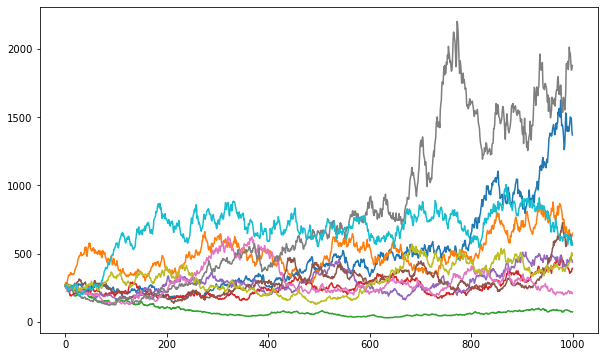

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);